[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/22tx6eo9)

# Métricas de Clasificación

En este notebook, exploraremos el uso de métricas de clasificación en dos escenarios diferentes: uno con un **dataset balanceado** y otro con un dataset desbalanceado. A través de estos ejemplos, se ilustrará cómo las métricas comunes de clasificación pueden ayudar a evaluar el rendimiento de modelos en diferentes contextos.

El objetivo principal es proporcionar una comprensión clara de cómo interpretar estas métricas, destacando la importancia de elegir las métricas adecuadas según la naturaleza del problema y la distribución de las clases. Se presentarán las siguientes métricas:

- Matriz de Confusión
- Precisión (Accuracy)
- Precisión (Precision)
- Recall
- F1-Score

Además, analizaremos cómo los modelos de clasificación pueden comportarse de manera diferente dependiendo de si los datos están balanceados o desbalanceados, y cómo estas métricas pueden revelar aspectos importantes del rendimiento del modelo que no siempre son evidentes con una sola métrica. Al final de este notebook, se espera que puedas interpretar y aplicar correctamente estas métricas para tomar decisiones informadas sobre la calidad de un modelo de clasificación.

**Nota**: Este notebook se enfocará en el dataset balanceado. 

In [1]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [3]:
import os

In [2]:
if IN_COLAB:
    # download a folder from github
    if not os.path.exists('datasets_github'):
        !wget -q -O repositorio.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
        !unzip -q repositorio.zip
        !mv CienciaDatos-MASDI-main/Seccion_3/dataset_sintetico datasets_github 
        !mv CienciaDatos-MASDI-main/Seccion_3/datasetanalyser.py datasetanalyser.py 
        !rm -rf repositorio.zip CienciaDatos-MASDI-main
        print("Archivos descargados y extraídos correctamente.")
    else:
        print("Archivos ya descargados y extraídos.")

In [4]:
dataset_sintetico_path = os.path.join(os.getcwd(), 'dataset_sintetico')

# 1. Análisis de los Datos

## 1.1. Cargar los Datos

Una empresa está lanzando un nuevo producto y quiere segmentar a los clientes en función de su nivel de interés. Para maximizar el impacto de la campaña, el equipo de marketing desea clasificar a los clientes en tres grupos:

- No Interesado: Clientes que probablemente no comprarán el producto.
- Interesado Moderado: Clientes que podrían estar interesados, pero aún necesitan más información o incentivos para comprar.
- Muy Interesado: Clientes que muestran un alto interés y tienen una gran probabilidad de comprar el producto.

- Variable Objetivo
  - Nivel_Interes:
  - Tipo: Categórica (0, 1, 2)
  - Descripción: Variable objetivo que indica el nivel de interés del cliente:
    - 0 = No Interesado
    - 1 = Interesado Moderado
    - 2 = Muy Interesado

In [5]:
# Importamos la biblioteca pandas
import pandas as pd
# definimos la ruta del dataset a cargar
datasets_folder_name = '/content/datasets_github' if IN_COLAB else dataset_sintetico_path
ruta_dataset = os.path.join(datasets_folder_name, 'dataset_1_clientes_nivel_interes_sintetico.csv')
# Cargamos el dataset
df1_clientes = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
df1_clientes.head()

,Edad,Ingreso_Anual,Gasto_Promedio,Productos_Anteriores,Puntuacion_Interes,Nivel_Interes
0,47,76330,1548,1,0.00,0
1,31,21816,983,0,0.75,1
2,43,52957,607,2,0.00,0
3,22,36022,598,0,0.06,2
4,37,32713,100,0,0.00,1


## 1.2. Explorar los Datos

Realiza un análisis exploratorio inicial para entender la estructura y el contenido del dataset. Esto incluye revisar el tipo de datos, el número de entradas, y estadísticas básicas para cada variable.

### Paso 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.

### Paso 1.4: Análisis Univariado
Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

### Paso 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Nivel_Interes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

### Paso 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

### Paso 1.7: Conclusiones Iniciales del Análisis
Resume los hallazgos clave de la exploración de los datos. Identifica características que distingan claramente los diferentes niveles de interés y patrones generales que podrías aprovechar en el modelado predictivo.

### Paso 1.8: Visualizaciones Adicionales para Insights
Crea visualizaciones adicionales si observaste patrones interesantes que merecen ser destacados. Estas visualizaciones pueden ayudar a comunicar mejor los resultados del análisis y proporcionar insights más profundos.

In [6]:
## 1.2. Exploración de los datos

# Información general del dataset
df1_clientes.info()

# Resumen estadístico de las variables numéricas
df1_clientes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Edad                  1500 non-null   int64  
 1   Ingreso_Anual         1500 non-null   int64  
 2   Gasto_Promedio        1500 non-null   int64  
 3   Productos_Anteriores  1500 non-null   int64  
 4   Puntuacion_Interes    1500 non-null   float64
 5   Nivel_Interes         1500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 70.4 KB


,Edad,Ingreso_Anual,Gasto_Promedio,Productos_Anteriores,Puntuacion_Interes,Nivel_Interes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,34.328667,45825.488667,1025.471333,0.752000,0.294913,1.001333
std,9.608652,19767.253997,627.561362,0.841607,0.381295,0.811852
min,18.000000,20000.000000,100.000000,0.000000,0.000000,0.000000
25%,28.000000,29547.250000,460.500000,0.000000,0.000000,0.000000
50%,34.000000,43045.000000,1064.500000,1.000000,0.040000,1.000000
75%,41.000000,58969.000000,1507.250000,1.000000,0.592500,2.000000
max,67.000000,107465.000000,3244.000000,5.000000,1.000000,2.000000


**Conclusión**

- Se observa que todos los datos son numéricos y no hay valores faltantes en el dataset.
- Las variables se encuentran en diferentes rangos, por lo que normalizarlas puede ser útil para el modelado.
- Existen 5 variables predictoras y una variable objetivo con 3 clases.

## 1.3: Comprobar Datos Faltantes o Anómalos
Verifica si hay valores faltantes y observa si hay valores fuera de los rangos esperados. Esto ayudará a identificar datos que necesiten limpieza o ajustes.


In [7]:
# recargar archivos .py externos de forma automática
%load_ext autoreload
%autoreload 2

In [8]:
# se importará la clase creada para la limpieza de datos
from datasetanalyser import DatasetAnalyzer

In [9]:
analyzer = DatasetAnalyzer(df1_clientes)

In [10]:
analyzer.check_missing_and_anomalies()

Valores faltantes por columna:
Edad                    0
Ingreso_Anual           0
Gasto_Promedio          0
Productos_Anteriores    0
Puntuacion_Interes      0
Nivel_Interes           0
dtype: int64

Valores negativos detectados en columnas numéricas:


No se encontraron valores faltantes en el dataset, lo que es un buen indicador de la calidad de los datos.

## 1.4: Análisis Univariado

Examina cada característica por separado para entender su distribución. Utiliza histogramas y diagramas de caja para visualizar la variabilidad de cada característica.

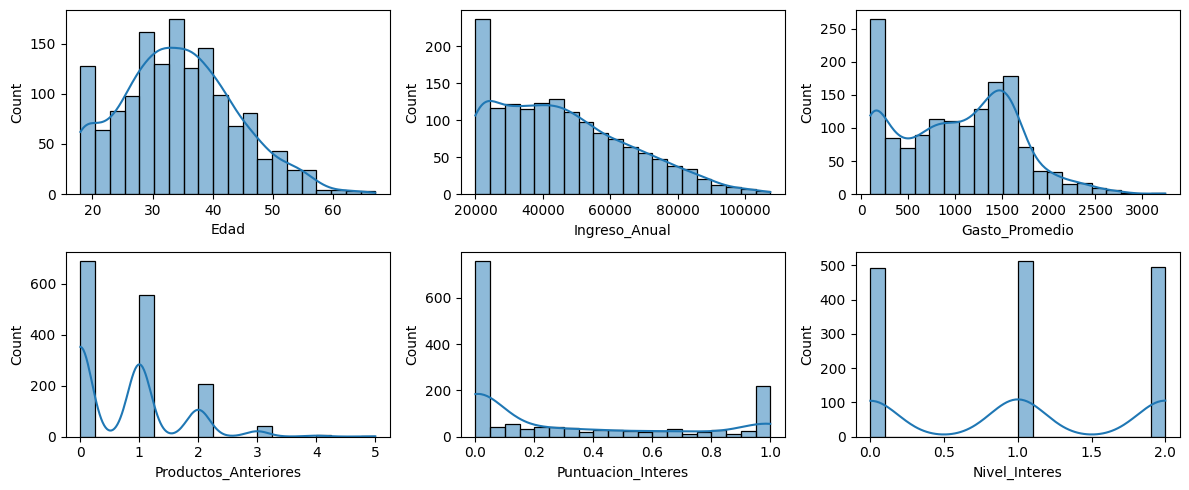

In [11]:
analyzer.univariate_analysis(plot_type='histogram', fig_size=(12, 5))

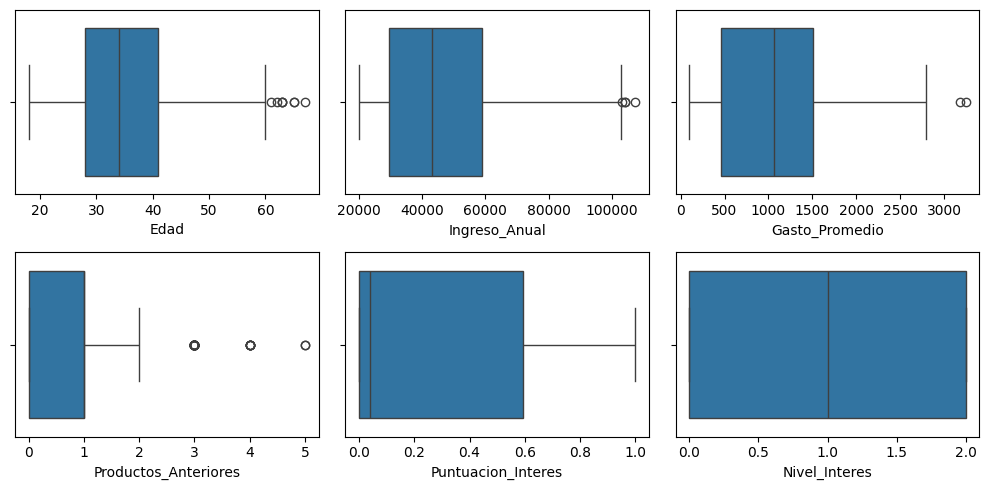

In [12]:
analyzer.univariate_analysis(plot_type='boxplot', fig_size=(10, 5))

**Conclusiones del Análisis Univariado**

1. Edad
- **Histograma**: La mayoría de los clientes tienen edades entre **30 y 40 años**, con una distribución que disminuye a medida que la edad aumenta.
- **Boxplot**: No se observan valores atípicos significativos; la distribución de la edad es estable dentro de un rango esperado.

2. Ingreso Anual
- **Histograma**: La distribución está **sesgada a la derecha**, con muchos clientes en el rango de **20,000 a 40,000** dólares y menos clientes con ingresos altos.
- **Boxplot**: Se identifican **valores atípicos** para ingresos superiores a **80,000 dólares**, sugiriendo la presencia de algunos clientes con ingresos significativamente más altos que el promedio.

3. Gasto Promedio
- **Histograma**: La distribución es **multimodal**, con picos en diferentes niveles de gasto, lo que indica que hay grupos distintos de comportamiento de gasto.
- **Boxplot**: Existen **valores atípicos** hacia el extremo superior, lo que sugiere que algunos clientes tienen un gasto promedio mucho más alto que la mayoría.

4. Productos Anteriores
- **Histograma**: La mayoría de los clientes compraron entre **0 y 2 productos** anteriormente, con un pico notable en **1 producto**.
- **Boxplot**: Los valores de **4 y 5 productos** aparecen como **valores atípicos**, indicando que son clientes con un historial de compras más extenso, aunque no es común.

5. Puntuación de Interés
- **Histograma**: Hay dos concentraciones principales: una en el rango **0-0.2** (bajo interés) y otra alrededor de **1.0** (alto interés), indicando que los clientes suelen estar muy interesados o poco interesados, con pocos en el medio.
- **Boxplot**: No hay valores atípicos destacados, pero la distribución muestra dos grupos claramente diferenciados de clientes con niveles de interés opuestos.

6. Nivel de Interés
- **Histograma**: La variable muestra **tres picos definidos**, sugiriendo que los clientes se agrupan en tres niveles de interés bien diferenciados.
- **Boxplot**: La distribución es uniforme entre las tres categorías de interés sin valores atípicos, lo que confirma que los niveles están claramente segmentados.


**Conclusiones Generales del Análisis Univariado**

- Distribuciones Asimétricas: Tanto el ingreso anual como el gasto promedio muestran distribuciones asimétricas, indicando que hay una minoría que gana y gasta mucho más que el promedio.
- Presencia de Valores Atípicos: Hay valores atípicos significativos en el ingreso anual, gasto promedio y productos anteriores. Estos valores extremos pueden ser clientes especiales (como clientes VIP o de alta lealtad) que podrían necesitar un análisis separado.
- Agrupaciones Claras: La puntuación de interés y el nivel de interés muestran agrupaciones bien definidas, lo que podría indicar que los clientes se clasifican claramente en niveles específicos de interés. Esto puede ser útil para segmentar y diseñar estrategias de marketing dirigidas.
- Variedad de Comportamientos: El gasto promedio tiene una distribución multimodal, lo que sugiere que existen varios grupos de comportamiento de clientes con diferentes hábitos de gasto.

## 1.5: Análisis Bivariado
Examina cómo se relacionan las características con la variable objetivo `Nivel_Interes`. Utiliza diagramas de dispersión y gráficos de violín para visualizar relaciones y patrones entre variables.

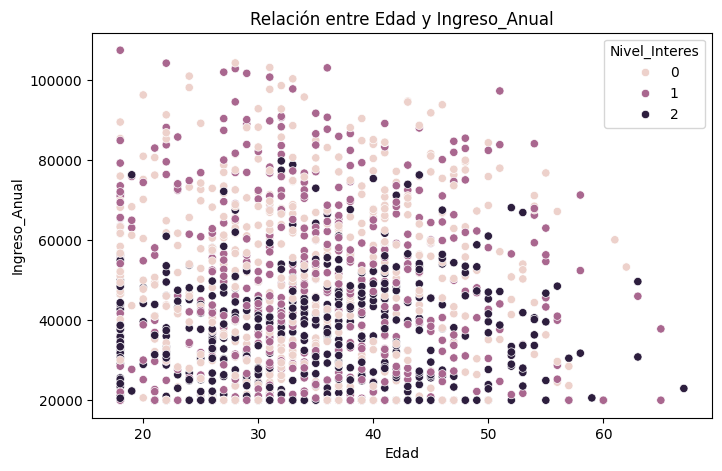

In [13]:
analyzer.bivariate_analysis("Edad", "Ingreso_Anual", hue="Nivel_Interes", plot_type='scatter')

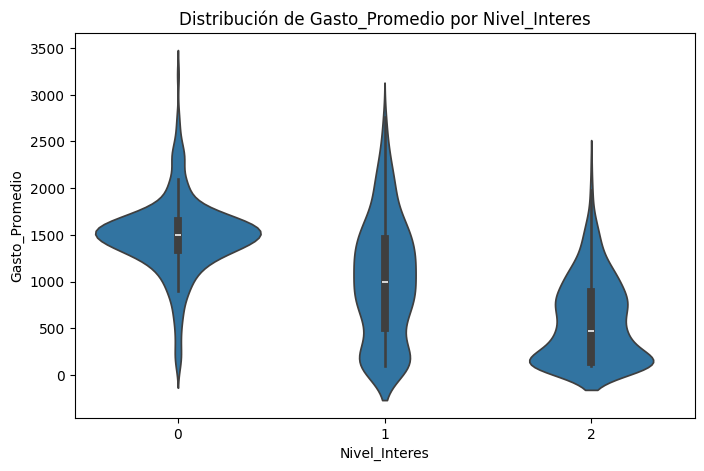

In [14]:
analyzer.bivariate_analysis("Nivel_Interes", "Gasto_Promedio", plot_type='violin')

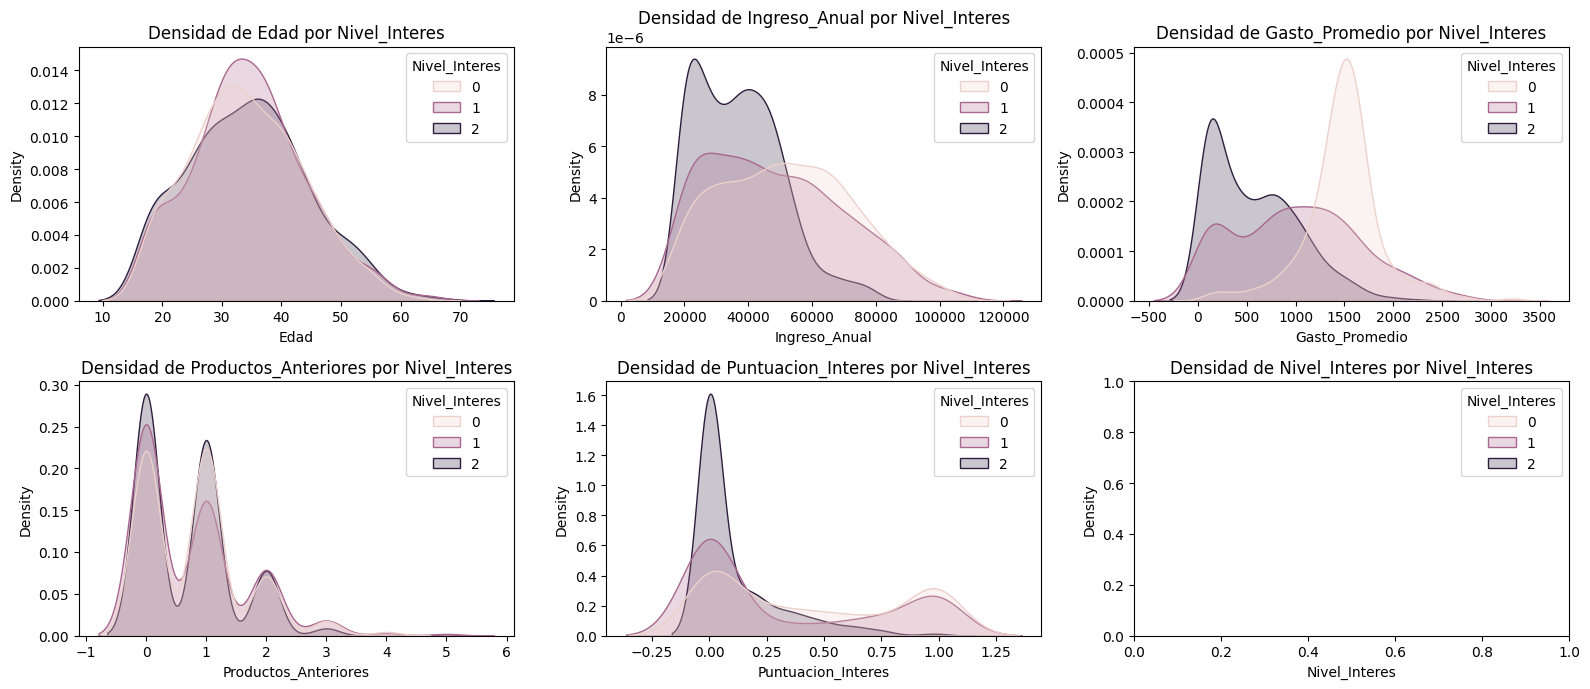

In [15]:
analyzer.density_analysis(target_col="Nivel_Interes", fig_size=(16, 7))

**Análisis Bivariado Simplificado**

1. Relación entre Edad e Ingreso Anual
- El **gráfico de dispersión** muestra que no hay una correlación clara entre la edad y el ingreso anual. 
- Los clientes se distribuyen de manera uniforme en todos los niveles de edad e ingreso.
- Las categorías de **Nivel_Interes** están representadas por diferentes colores, pero no parece haber una diferenciación clara basada en estos atributos.

2. Distribución de Gasto Promedio por Nivel_Interes
- El **gráfico de violín** revela que los clientes con **Nivel_Interes 0** (más bajo) tienen una mayor variabilidad en el gasto promedio, con algunos que gastan significativamente más.
- Los clientes con **Nivel_Interes 1** y **Nivel_Interes 2** tienden a gastar menos en promedio, y la distribución es más compacta, lo que indica menos variabilidad en su gasto.

3. Densidad de Características por Nivel_Interes
- **Edad**: Las distribuciones de edad son similares entre las tres categorías de **Nivel_Interes**, con picos en edades cercanas a los **30-40 años**.
- **Ingreso Anual**: Los clientes con **Nivel_Interes 0** tienden a tener un rango de ingreso más alto en comparación con los otros niveles de interés.
- **Gasto Promedio**: Se observa que el **Nivel_Interes 0** presenta una mayor densidad en los valores de gasto promedio más altos, lo que refuerza la observación de mayor variabilidad de gasto.
- **Productos Anteriores**: La mayoría de los clientes en todos los niveles han comprado entre **0 y 2 productos** anteriormente, pero el **Nivel_Interes 0** muestra un segundo pico para clientes que compraron más productos.
- **Puntuación de Interés**: Los clientes con **Nivel_Interes 2** tienen una mayor densidad en puntuaciones más altas, sugiriendo una mayor coherencia en su nivel de interés.

**Conclusiones Generales**
- Los clientes con **Nivel_Interes 0** muestran mayor variabilidad en sus patrones de compra, especialmente en el **gasto promedio** y el **número de productos comprados**.
- No hay una correlación clara entre la **edad** y el **ingreso** que diferencie las categorías de interés.
- Las **distribuciones de densidad** ayudan a identificar patrones clave: el **Ingreso Anual** y el **Gasto Promedio** parecen ser los atributos que más diferencias muestran entre los niveles de interés.


## 1.6: Análisis de Correlación
Verifica las correlaciones entre las características para identificar posibles relaciones que puedan ser importantes en el análisis. Esto puede ayudar a reducir la multicolinealidad y seleccionar las características más relevantes.

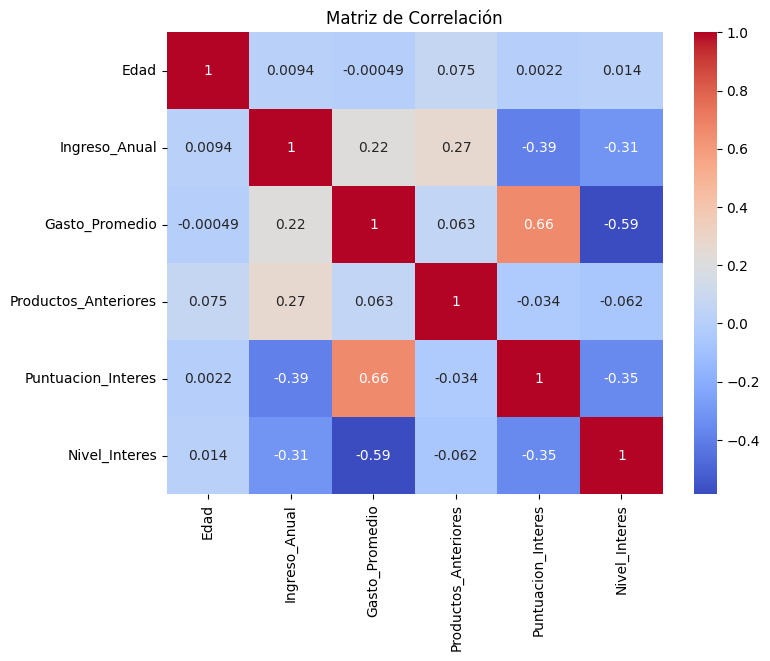

In [16]:
analyzer.correlation_analysis(fig_size=(8, 6))

**Análisis de la Matriz de Correlación**

La **matriz de correlación** muestra las relaciones lineales entre las diferentes características del dataset. Aquí se destacan las correlaciones significativas que pueden ser útiles para interpretar patrones en los datos:

1. Gasto Promedio y Puntuación de Interés
- **Correlación: 0.66** (positiva)
- Existe una correlación moderada-alta entre el **Gasto Promedio** y la **Puntuación de Interés**, lo que sugiere que a medida que aumenta la puntuación de interés, los clientes tienden a gastar más. Esto indica que el nivel de interés podría ser un buen indicador para predecir el gasto.

1. Gasto Promedio y Nivel_Interes
- **Correlación: -0.59** (negativa)
- Hay una correlación moderada-negativa entre el **Gasto Promedio** y el **Nivel_Interes**, lo que sugiere que a medida que aumenta el nivel de interés, el gasto promedio disminuye. Esto podría indicar diferencias en los comportamientos de compra entre los diferentes niveles de interés.

1. Ingreso Anual y Puntuación de Interés
- **Correlación: -0.39** (negativa)
- Existe una correlación negativa entre el **Ingreso Anual** y la **Puntuación de Interés**, lo que sugiere que los clientes con ingresos más altos tienden a tener una menor puntuación de interés. Esto puede indicar que la puntuación de interés no está directamente relacionada con el poder adquisitivo.

1. Ingreso Anual y Nivel_Interes
- **Correlación: -0.31** (negativa)
- Hay una correlación negativa entre el **Ingreso Anual** y el **Nivel_Interes**, lo que sugiere que a medida que aumenta el nivel de interés, el ingreso anual tiende a disminuir. Esto refuerza la observación anterior de que el nivel de interés no necesariamente se asocia con clientes de ingresos más altos.

1. Productos Anteriores e Ingreso Anual
- **Correlación: 0.27** (positiva)
- Se observa una correlación positiva entre el **número de Productos Anteriores** y el **Ingreso Anual**, lo que indica que los clientes que han comprado más productos en el pasado tienden a tener mayores ingresos.

1. Otras Observaciones
- **Edad** no presenta correlaciones significativas con ninguna otra variable, lo que sugiere que no tiene un impacto directo en el comportamiento de gasto, ingreso, o nivel de interés.
- **Productos Anteriores** muestra correlaciones bajas con otras variables, lo que indica que es un atributo independiente con poca influencia sobre las demás características.

**Conclusión General**
- El **Gasto Promedio** y la **Puntuación de Interés** parecen ser los atributos más interrelacionados, sugiriendo que el comportamiento de gasto está alineado con el interés del cliente. 
- Las **correlaciones negativas** de **Ingreso Anual** con **Puntuación de Interés** y **Nivel_Interes** indican que hay diferencias en los patrones de comportamiento que pueden requerir un análisis adicional.
- Los resultados sugieren que ciertos atributos, como **Gasto Promedio** y **Puntuación de Interés**, podrían ser claves para entender y predecir el comportamiento del cliente, mientras que otros, como **Edad**, muestran menor relevancia en las correlaciones.


## 1.7: Conclusiones del Análisis

1. **Distribuciones Asimétricas**: Las variables de ingreso anual y gasto promedio muestran distribuciones asimétricas, lo que indica que hay una minoría de clientes con ingresos y gastos significativamente más altos que el promedio.
2. **Valores Atípicos**: Se identificaron valores atípicos en el ingreso anual, gasto promedio y productos anteriores, lo que sugiere la presencia de clientes especiales que podrían requerir un análisis más detallado.
3. **Agrupaciones Claras**: La puntuación de interés y el nivel de interés muestran agrupaciones bien definidas, lo que podría ser útil para segmentar a los clientes y diseñar estrategias de marketing específicas.
4. **Variedad de Comportamientos**: El gasto promedio tiene una distribución multimodal, lo que sugiere que existen diferentes grupos de comportamiento de clientes con hábitos de gasto distintos.
5. **Correlaciones Clave**: Se identificaron correlaciones significativas entre el gasto promedio, la puntuación de interés y el nivel de interés, lo que sugiere que estos atributos podrían ser importantes para predecir el comportamiento del cliente.
6. **Relevancia de las Variables**: Algunas variables, como la edad, mostraron correlaciones bajas con otras características, lo que sugiere que su impacto en el comportamiento del cliente es limitado.

# 2. Preparación de los Datos

Antes de construir y evaluar modelos de clasificación, es importante preparar los datos para el análisis. Esto incluye la normalización de las características, la codificación de variables categóricas y la división del dataset en conjuntos de entrenamiento y prueba.

- Normalización de Características
- Remoción de Variables Redundantes
- División del Dataset

## 2.1: Normalización de Características

Dado que las características del dataset tienen diferentes escalas y rangos, es útil normalizarlas para que tengan una distribución más uniforme. Esto puede mejorar el rendimiento de los modelos de clasificación y facilitar la interpretación de los coeficientes.

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_clientes_scaled = df1_clientes.copy()
df1_clientes_scaled[["Edad", "Ingreso_Anual", "Gasto_Promedio"]] = scaler.fit_transform(df1_clientes[["Edad", "Ingreso_Anual", "Gasto_Promedio"]])

df1_clientes_scaled.describe()

,Edad,Ingreso_Anual,Gasto_Promedio,Productos_Anteriores,Puntuacion_Interes,Nivel_Interes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.333238,0.295267,0.294361,0.752000,0.294913,1.001333
std,0.196095,0.226002,0.199606,0.841607,0.381295,0.811852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204082,0.109155,0.114663,0.000000,0.000000,0.000000
50%,0.326531,0.263477,0.306775,1.000000,0.040000,1.000000
75%,0.469388,0.445538,0.447599,1.000000,0.592500,2.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,2.000000


## 2.2: Remoción de Variables Redundantes

Para evitar la multicolinealidad y reducir la complejidad del modelo, es útil eliminar variables redundantes o altamente correlacionadas. En este caso, se eliminará la variable `Edad` y `Productos_Anteriores` debido a su baja correlación con las demás características.

In [24]:
df1_clientes_scaled.drop(columns=["Edad", "Productos_Anteriores"], inplace=True)
df1_clientes_scaled.head()

,Ingreso_Anual,Gasto_Promedio,Puntuacion_Interes,Nivel_Interes
0,0.644029,0.460560,0.00,0
1,0.020763,0.280852,0.75,1
2,0.376802,0.161260,0.00,0
3,0.183182,0.158397,0.06,2
4,0.145350,0.000000,0.00,1


## 2.4: División del Dataset

Para evaluar el rendimiento de los modelos de clasificación, es necesario dividir el dataset en conjuntos de entrenamiento y prueba. Esto permite entrenar los modelos en una parte de los datos y evaluar su rendimiento en una parte independiente. En este caso, se utilizará una proporción de 80% para entrenamiento y 20% para prueba.

In [25]:
from sklearn.model_selection import train_test_split

X = df1_clientes_scaled.drop(columns=["Nivel_Interes"])
y = df1_clientes_scaled["Nivel_Interes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 3), (300, 3), (1200,), (300,))

# 3. Construcción y Evaluación de Modelos

Se utilizará el modelo random forest para clasificar a los clientes en los tres niveles de interés. Luego, se evaluará el rendimiento del modelo utilizando métricas de clasificación comunes, como la matriz de confusión, la precisión, el recall, el F1-score.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## 3.1: Construcción del Modelo

In [27]:
# Cargar el modelo - Se usan los hiperparámetros por defecto
rf_model = RandomForestClassifier()

# Entrenamiento del modelo
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

RandomForestClassifier()

## 3.2: Evaluación del Modelo

### 3.2.1: Matriz de Confusión

In [32]:
# matriz de confusión con seaborn heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels: list, figsize=(8, 6)):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

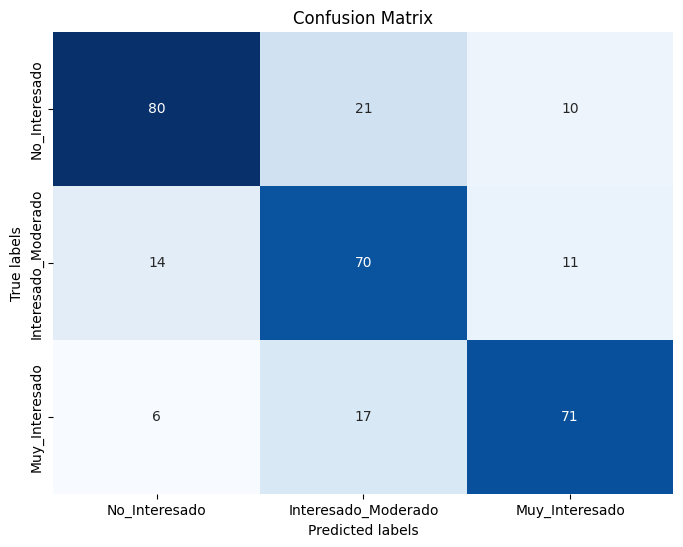

In [33]:
labels = ["No_Interesado", "Interesado_Moderado", "Muy_Interesado"]
conf_matrix = plot_confusion_matrix(y_test, y_pred, labels)

### 3.2.2: Reporte de Clasificación


In [40]:
print(classification_report(y_test, y_pred, target_names=labels))

                     precision    recall  f1-score   support

      No_Interesado       0.80      0.72      0.76       111
Interesado_Moderado       0.65      0.74      0.69        95
     Muy_Interesado       0.77      0.76      0.76        94

           accuracy                           0.74       300
          macro avg       0.74      0.74      0.74       300
       weighted avg       0.74      0.74      0.74       300



## 3.3: Interpretación de las Métricas

### 3.3.1: Interpretación de la Matriz de Confusión

- **No_Interesado**:
  - **Verdaderos Positivos (TP)**: 80 — correctamente clasificados como No_Interesado.
  - **Falsos Negativos (FN)**: 31 (21 + 10) — clasificados erróneamente como Interesado_Moderado o Muy_Interesado.
  - La mayoría de los No_Interesado son identificados correctamente, pero hay errores al confundirlos con otras clases.

- **Interesado_Moderado**:
  - **TP**: 70 — correctamente clasificados como Interesado_Moderado.
  - **FN**: 25 (14 + 11) — clasificados erróneamente como No_Interesado o Muy_Interesado.
  - Se observa que esta clase tiene una precisión menor, con algunos ejemplos que se clasifican incorrectamente como las otras dos clases.

- **Muy_Interesado**:
  - **TP**: 71 — correctamente clasificados como Muy_Interesado.
  - **FN**: 23 (6 + 17) — clasificados erróneamente como No_Interesado o Interesado_Moderado.
  - La mayoría de los Muy_Interesado son correctamente identificados, pero se observa cierta confusión con la clase Interesado_Moderado.



### 3.3.2: Análisis del Reporte de Clasificación

| Clase                 | Precisión | Recall  | F1-Score | Soporte |
|-----------------------|-----------|---------|----------|---------|
| No_Interesado         | 0.80      | 0.72    | 0.76     | 111     |
| Interesado_Moderado   | 0.65      | 0.74    | 0.69     | 95      |
| Muy_Interesado        | 0.77      | 0.76    | 0.76     | 94      |
| **Promedio Macro**    | 0.74      | 0.74    | 0.74     |         |
| **Promedio Ponderado**| 0.74      | 0.74    | 0.74     | 300     |

**Observaciones**:
- **No_Interesado** tiene la **mejor precisión (0.80)**, lo que indica que cuando el modelo predice esta clase, suele ser correcto. Sin embargo, su **recall es 0.72**, lo que significa que hay un 28% de instancias de esta clase que no se detectan correctamente.
- **Interesado_Moderado** tiene la **precisión más baja (0.65)**, lo que indica que el modelo tiene dificultades para clasificar correctamente esta clase, confundiendo algunas instancias con las otras dos.
- **Muy_Interesado** muestra una **buena precisión y recall (0.77 y 0.76)**, lo que significa que el modelo es bastante efectivo al identificar correctamente esta clase y al mismo tiempo logra capturar la mayoría de sus ejemplos.

### 3.3.3: Precisión Global y Promedios
- **Accuracy**: 0.74 (74%)
  - El **accuracy** es la proporción de todas las predicciones correctas en relación con el total de instancias. 
  - En este caso, el modelo clasifica correctamente el **74%** de las instancias, lo que indica un rendimiento aceptable.

- **Promedio Macro**:
  - Indica el promedio de precisión, recall y F1-score calculados de manera independiente para cada clase, sin tener en cuenta el tamaño de cada clase.
  - En este caso, todos los valores son **0.74**, lo que sugiere que el rendimiento es bastante equilibrado entre las clases.

- **Promedio Ponderado**:
  - Calcula el promedio ponderado considerando el número de instancias de cada clase, lo que da una medida más precisa del rendimiento global.
  - Los valores son idénticos a los del promedio macro, indicando que las clases tienen tamaños relativamente balanceados.

### 3.3.4: ¿Por Qué el Accuracy es Válido Aquí?
El **accuracy** es una métrica adecuada en este caso porque el **dataset está balanceado**, es decir, el número de ejemplos en cada clase es similar. En escenarios balanceados, el accuracy refleja bien el rendimiento del modelo, ya que no hay ninguna clase que predomine significativamente sobre las demás. En casos desbalanceados, el accuracy podría ser engañoso porque el modelo podría enfocarse en la clase mayoritaria y aún tener un accuracy alto, mientras que las otras clases se clasifican incorrectamente. Aquí, al ser un dataset balanceado, el accuracy de **0.74** es una buena representación del rendimiento general.

### Conclusiones Generales
- El modelo tiene un **rendimiento sólido** en general, con un **accuracy del 74%**.
- **No_Interesado** es la clase que el modelo predice mejor, mientras que **Interesado_Moderado** presenta más dificultades.
- Se podría considerar **ajustar los pesos** para mejorar la precisión de las clases con peor rendimiento o **explorar características adicionales** para mejorar la capacidad del modelo de distinguir entre las tres clases.